Finding the number of twilight observations for DDF in minion_1016. 

In [1]:
import opsimsummary as oss

In [2]:
import numpy as np

In [3]:
%matplotlib inline
import matplotlib.pyplot as plt

In [4]:
import seaborn as sns
sns.set_style('whitegrid')

In [5]:
#https://github.com/rbiswas4/vizutils
import vizutils

In [6]:
from lsst.sims.photUtils import BandpassDict

In [7]:
# get the database from https://www.lsst.org/scientists/simulations/opsim/opsim-v335-benchmark-surveys
opsout = oss.OpSimOutput.fromOpSimDB('/Users/rbiswas/data/LSST/OpSimData/minion_1016_sqlite.db', subset='_all')

 reading from database sqlite:////Users/rbiswas/data/LSST/OpSimData/minion_1016_sqlite.db


In [8]:
# SunAlt is in radians in the database. Convert -20 degrees to radians 
threshold = np.radians(-20.)
#fig, ax, ay = vizutils.filtSubplots()
#opsout.summary.query('sunAlt > @threshold').hist('night', histtype='step', bins=10, by='filter', ax=ax)

## Twilight Observations in DDF

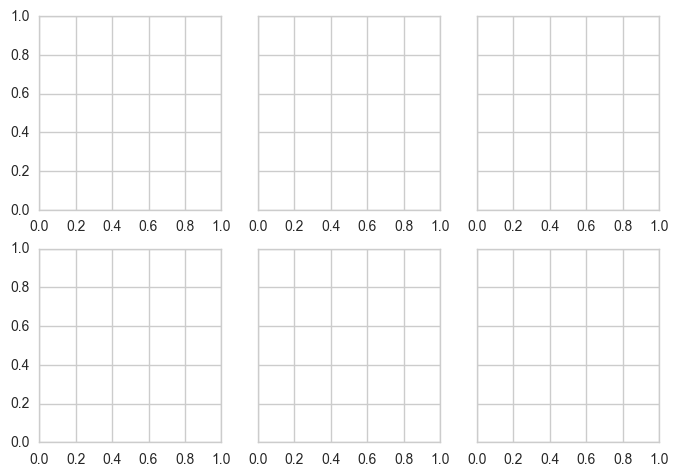

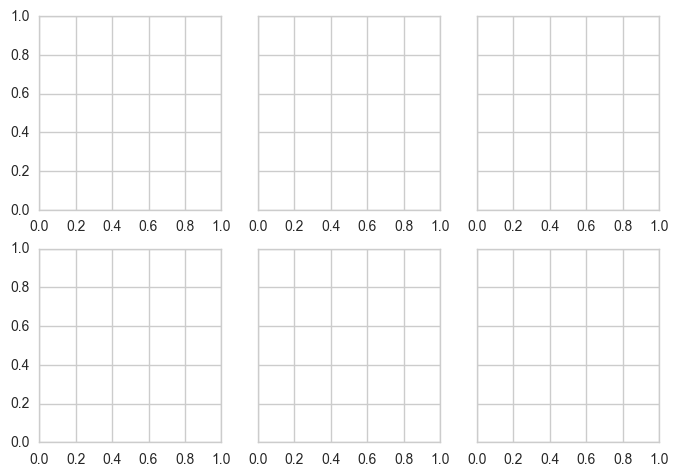

In [9]:
fig, ax, ay = vizutils.filtSubplots(sharey=True);

In [10]:
opsout.summary.query('propID == 56').hist('sunAlt', by='filter', ax=ax, histtype='step', normed=1, cumulative=-1,
                    bins=np.arange(-1.6, -0.2, 0.05), lw=1, alpha=1)
for xx in ay.flat:
    xx.axvline(threshold, color='k', ls='dashed')
    #xx.set_xlim(-0.6, -0.2)
    #xx.set_ylim(0., 0.6)
ay[0, 0].set_ylabel('CDF')
ay[1, 0].set_ylabel('CDF')

In [11]:
for axx in ay.flat[3:]:
    axx.set_xlabel('sunAlt (rad)')

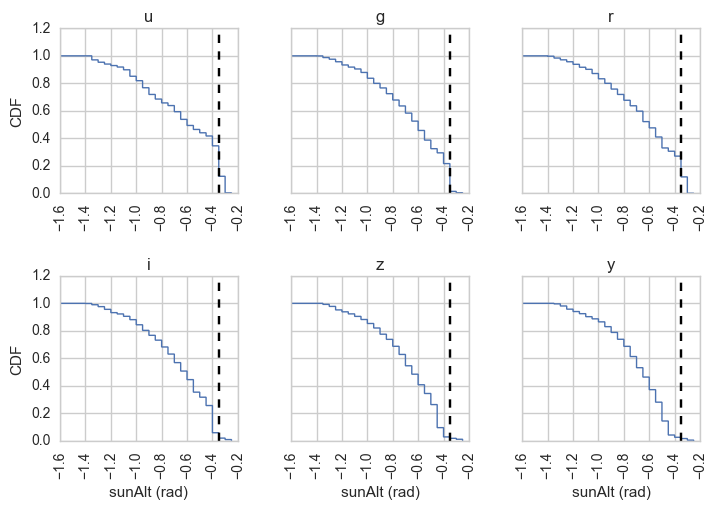

In [12]:
fig

In [13]:
fig.savefig('sunAlt.png')

### How many of the twilight observations are shared with WFD

In [23]:
alltwillight = opsout.summary.ix[opsout.summary.query('propID == 56 and sunAlt > @threshold').index].propID.size

In [24]:
wfdshared = opsout.summary.ix[opsout.summary.query('propID == 56 and sunAlt > @threshold').index].query('propID == 54').propID.size

In [26]:
wfdshared/np.float(alltwillight)

0.004900459418070444

## Sky Brightness with Filter

In [27]:
df = opsout.summary.groupby('filter').agg(dict(filtSkyBrightness=lambda x: np.median(x)))
bps = BandpassDict.loadTotalBandpassesFromFiles()
df['wavelen'] = list(bps[b].calcEffWavelen()[0] for b in df.index.values)
df.sort('wavelen', inplace=True)

/usr/local/miniconda/lib/python2.7/site-packages/ipykernel/__main__.py:4: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)


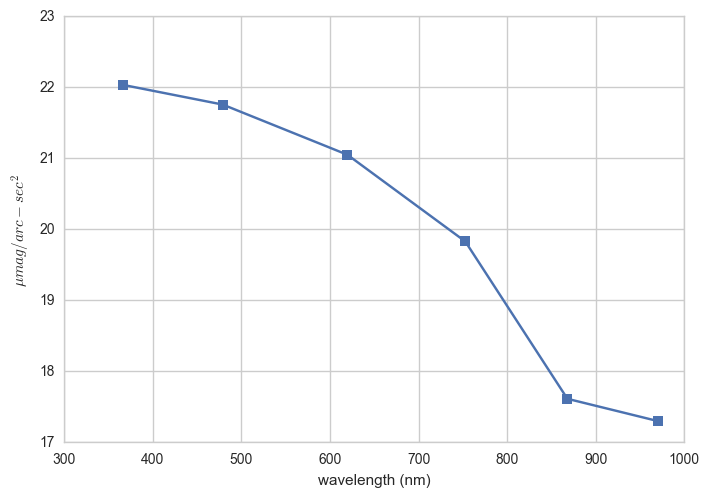

In [28]:
fig, ax = plt.subplots()
ax.plot(df.wavelen, df.filtSkyBrightness, '-s')
ax.set_xlabel('wavelength (nm)')
ax.set_ylabel(r'$\mu mag/arc-sec^2$')